In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

In [5]:
a = atlas.Atlas( './atlas', bibtex_fp='../cc/tests/data/example_atlas/example.bib' )

#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

# Plot

In [22]:
import cProfile

         445568483 function calls (445567985 primitive calls) in 399.641 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:416(parent)
       27    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
        1    0.000    0.000  399.641  399.641 <string>:1(<module>)
       54    0.000    0.000    0.000    0.000 <string>:12(__new__)
        1    0.000    0.000    0.000    0.000 __init__.py:1075(_combine_masks)
   143916    0.276    0.000   22.965    0.000 __init__.py:115(word_tokenize)
   143916    0.235    0.000   12.568    0.000 __init__.py:131(<listcomp>)
        1    0.000    0.000    0.000    0.000 __init__.py:1322(get_backend)
        2    0.000    0.000    0.000    0.000 __init__.py:1342(is_interactive)
        7    0.000    0.000    0.000    0.000 __init__.py:1373(is_math_text)
       24    0.000    0.000    0.0

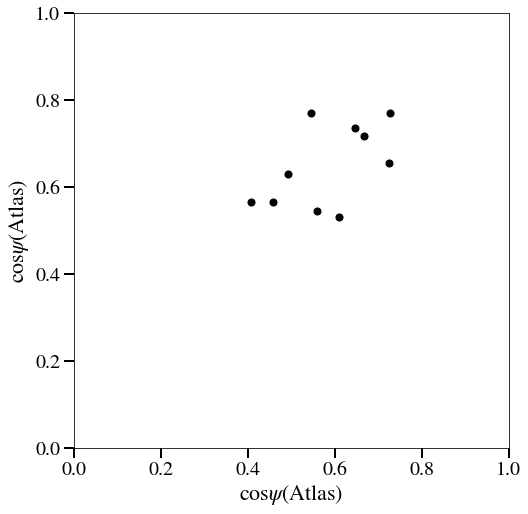

In [23]:
%matplotlib inline

cProfile.run(
'''cospsi_a, cospsi_a_abs = a.plot_cospsi2d(
    a,
    a,
    y_kwargs = { 'method': 'abstract similarity'},
)'''
)

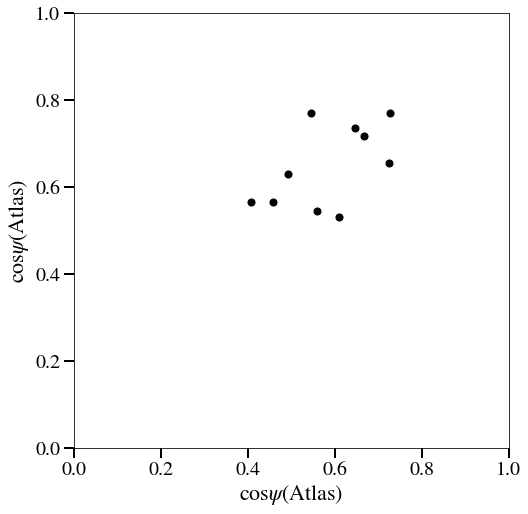

In [11]:
%matplotlib inline

cospsi_a, cospsi_a_abs = a.plot_cospsi2d(
    a,
    a,
    y_kwargs = { 'method': 'abstract similarity'},
)

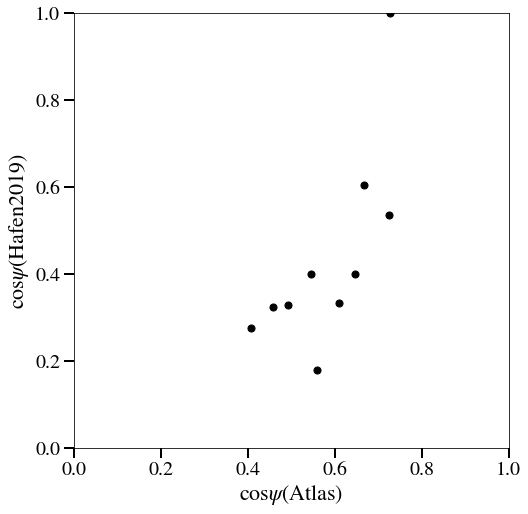

In [12]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    a,
    a.data['Hafen2019'],
)